<a href="https://colab.research.google.com/github/Dohy-Lee/ML_DL.Basic/blob/main/9_3)LSTM_and_GRU_Cell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#LSTM에는 순환되는 상태가 2가지임. 1. 은닉상태 2. 셀 상태
#셀 상태는 다음 층으로 전달되지 않고, LSTM에서 순환만 되는 값
#삭제 게이트, 입력 게이트, 출력 게이트로 이루어져있음
#삭제 게이트:셀 상태에 있는 정보를 제거하는 역할
#입력 게이트:새로운 정보를 셀 상태에 추가
#출력 게이트:셀 상태를 다음 은닉 상태로 출력

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input,val_input,train_target,val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow import keras
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)
model=keras.Sequential()
model.add(keras.layers.Embedding(500,16,input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_4 (LSTM)               (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-lstm-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 19s 47ms/step - loss: 0.6925 - accuracy: 0.5312 - val_loss: 0.6918 - val_accuracy: 0.5732
Epoch 2/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6902 - accuracy: 0.6047 - val_loss: 0.6889 - val_accuracy: 0.6122
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6852 - accuracy: 0.6421 - val_loss: 0.6818 - val_accuracy: 0.6408
Epoch 4/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6679 - accuracy: 0.6423 - val_loss: 0.6483 - val_accuracy: 0.6526
Epoch 5/100
313/313 [==============================] - 13s 41ms/step - loss: 0.6141 - accuracy: 0.7072 - val_loss: 0.5987 - val_accuracy: 0.7328
Epoch 6/100
313/313 [==============================] - 13s 42ms/step - loss: 0.5838 - accuracy: 0.7451 - val_loss: 0.5790 - val_accuracy: 0.7502
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.5656 - accuracy: 0.7581 - val_loss: 0.5638 - val_ac

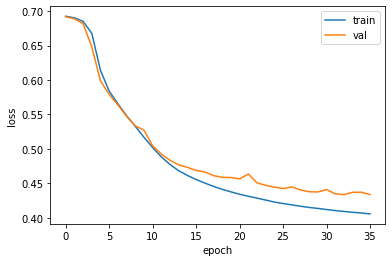

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model2=keras.Sequential()
model2.add(keras.layers.Embedding(500,16,input_length=100))
model2.add(keras.layers.LSTM(8,dropout=0.3))#SimpleRNN과 LSTM 모두 dropout 매개변수와 recurrent_dropout 매개변수를 가지고 있음
                                            #dropout 매개변수:셀의 입력에 드롭아웃 적용, recurrent_dropout 매개변수:순환되는 은닉 상태에 드롭아웃을 적용. 그러나 기술적인 문제로 recurrent_dropout사용시 GPU를 사용하여 모델을 훈련할 수 없음. 따라서 훈련 속도가 크게 저하됨
model2.add(keras.layers.Dense(1,activation='sigmoid'))
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-dropout-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model2.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 17s 47ms/step - loss: 0.6926 - accuracy: 0.5369 - val_loss: 0.6921 - val_accuracy: 0.5780
Epoch 2/100
313/313 [==============================] - 14s 44ms/step - loss: 0.6908 - accuracy: 0.5975 - val_loss: 0.6896 - val_accuracy: 0.6094
Epoch 3/100
313/313 [==============================] - 14s 45ms/step - loss: 0.6850 - accuracy: 0.6090 - val_loss: 0.6783 - val_accuracy: 0.5666
Epoch 4/100
313/313 [==============================] - 14s 46ms/step - loss: 0.6436 - accuracy: 0.6262 - val_loss: 0.6220 - val_accuracy: 0.7072
Epoch 5/100
313/313 [==============================] - 15s 46ms/step - loss: 0.6056 - accuracy: 0.7333 - val_loss: 0.6002 - val_accuracy: 0.7470
Epoch 6/100
313/313 [==============================] - 14s 45ms/step - loss: 0.5893 - accuracy: 0.7534 - val_loss: 0.5861 - val_accuracy: 0.7554
Epoch 7/100
313/313 [==============================] - 14s 44ms/step - loss: 0.5765 - accuracy: 0.7556 - val_loss: 0.5750 - val_ac

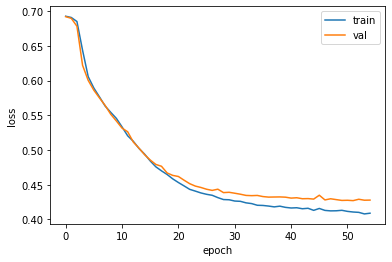

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
model3=keras.Sequential()
model3.add(keras.layers.Embedding(500,16,input_length=100))
model3.add(keras.layers.LSTM(8,dropout=0.3, return_sequences=True))#케라스의 순환층에서 모든 타임스텝의 은닉 상태를 출력하기위해서는 마지막을 제외한 다른 모든 순환층에서 return_sequence 매개변수를 True로 지정
model3.add(keras.layers.LSTM(8,dropout=0.3))
model3.add(keras.layers.Dense(1,activation='sigmoid'))
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_6 (LSTM)               (None, 100, 8)            800       
                                                                 
 lstm_7 (LSTM)               (None, 8)                 544       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-2rnn-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model3.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 32s 86ms/step - loss: 0.6930 - accuracy: 0.5127 - val_loss: 0.6929 - val_accuracy: 0.5146
Epoch 2/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6919 - accuracy: 0.5512 - val_loss: 0.6913 - val_accuracy: 0.5648
Epoch 3/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6884 - accuracy: 0.6055 - val_loss: 0.6849 - val_accuracy: 0.6344
Epoch 4/100
313/313 [==============================] - 26s 83ms/step - loss: 0.6690 - accuracy: 0.6621 - val_loss: 0.6375 - val_accuracy: 0.6912
Epoch 5/100
313/313 [==============================] - 27s 86ms/step - loss: 0.5847 - accuracy: 0.7128 - val_loss: 0.5539 - val_accuracy: 0.7292
Epoch 6/100
313/313 [==============================] - 26s 83ms/step - loss: 0.5385 - accuracy: 0.7401 - val_loss: 0.5215 - val_accuracy: 0.7486
Epoch 7/100
313/313 [==============================] - 26s 84ms/step - loss: 0.5123 - accuracy: 0.7580 - val_loss: 0.4996 - val_ac

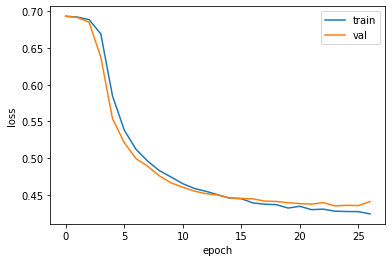

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
#GRU(Gated Recurrent Unit) : LSTM과 달리 셀 상태를 계산하지 않고, 은닉 상태 하나만 포함. LSTM에 비해 가중치가 적기 때문에 계산량이 적지만, LSTM와 비슷한 성능을 냄
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500,16,input_length=100)) #입력에 곱하는 가중치 16*8, 은닉 상태에 곱하는 가중치 8*8, 절편 8, GRU의 셀의 갯수는 3개 따라서 (16*8 + 8*8 + 8) * 3 = 600 + 뉴런의 개수 8 * 작은 셀마다 하나씩 절편이 있음→GRU 절편수 3 = 624
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1,activation='sigmoid'))
model4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 100, 16)           8000      
                                                                 
 gru (GRU)                   (None, 8)                 624       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop=keras.optimizers.RMSprop(learning_rate=1e-4)
model4.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cb=keras.callbacks.ModelCheckpoint('best-gru-model.h5',save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)
history = model4.fit(train_seq,train_target,epochs=100,batch_size=64,validation_data=(val_seq,val_target),callbacks=[checkpoint_cb,early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 18s 50ms/step - loss: 0.6923 - accuracy: 0.5411 - val_loss: 0.6918 - val_accuracy: 0.5458
Epoch 2/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6900 - accuracy: 0.5814 - val_loss: 0.6892 - val_accuracy: 0.5780
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6864 - accuracy: 0.6048 - val_loss: 0.6851 - val_accuracy: 0.5924
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6807 - accuracy: 0.6194 - val_loss: 0.6789 - val_accuracy: 0.5984
Epoch 5/100
313/313 [==============================] - 15s 49ms/step - loss: 0.6720 - accuracy: 0.6271 - val_loss: 0.6694 - val_accuracy: 0.6186
Epoch 6/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6590 - accuracy: 0.6413 - val_loss: 0.6552 - val_accuracy: 0.6302
Epoch 7/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6394 - accuracy: 0.6575 - val_loss: 0.6333 - val_ac

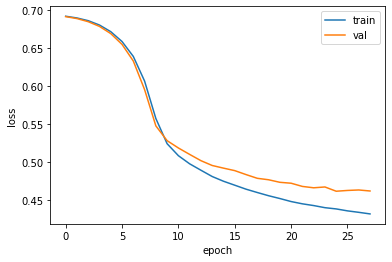

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model=keras.models.load_model('best-2rnn-model.h5')
rnn_model.evaluate(test_seq,test_target)

782/782 [==============================] - 13s 15ms/step - loss: 0.4316 - accuracy: 0.7978


[0.431566059589386, 0.7978399991989136]